In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from Excel sheets
file_path = 'Analytical_Case_Business_Credit_Risk_Excel 2022.xlsx'
credit_applications = pd.read_excel(file_path, sheet_name='CREDIT_APPLICATIONS')
credit_risk = pd.read_excel(file_path, sheet_name='CREDIT_RISK')
targets = pd.read_excel(file_path, sheet_name='Target')

# Merging the datasets on the 'BAN' column
merged_data = pd.merge(credit_applications, credit_risk, on='BAN')

# Determine activated applications
merged_data['is_activated'] = merged_data['START_MONTH'].notna().astype(int)

# Compute overall activation rate
total_applications = len(merged_data)
activated_applications = merged_data['is_activated'].sum()
activation_rate = activated_applications / total_applications * 100
print(f"Total applications: {total_applications}")
print(f"Activated applications: {activated_applications}")
print(f"Overall activation rate: {activation_rate:.2f}%")

Total applications: 73661
Activated applications: 51610
Overall activation rate: 70.06%


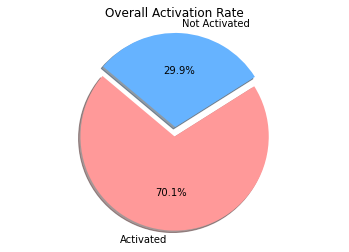

In [10]:
# Visual 1: Overall Activation Rate Pie Chart
labels = ['Activated', 'Not Activated']
sizes = [activated_applications, total_applications - activated_applications]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Overall Activation Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

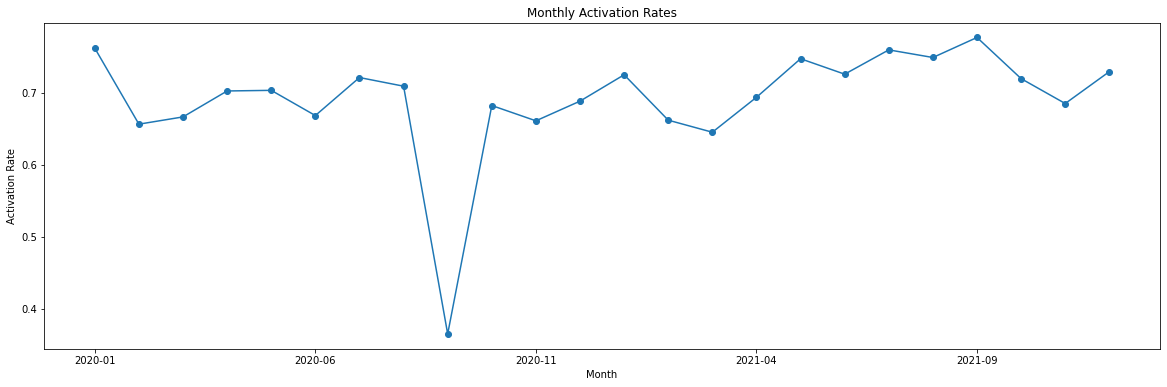

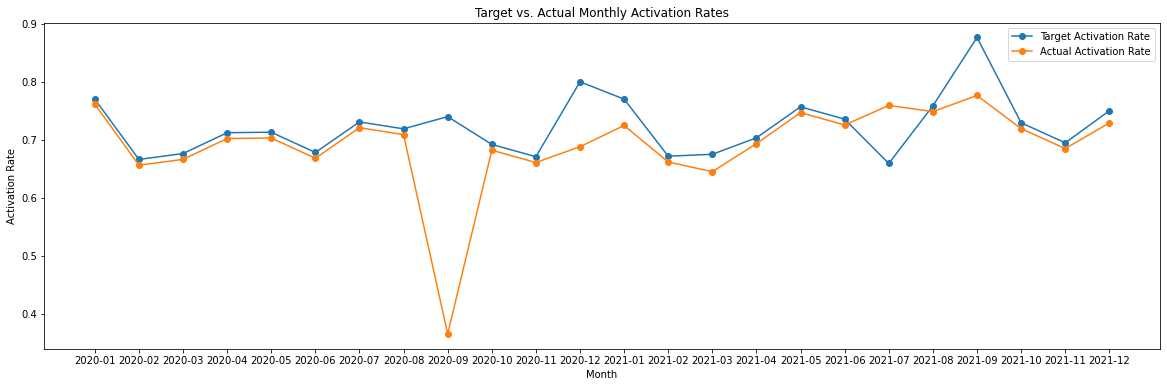

In [11]:
# Monthly activation rates
monthly_activation_rates = merged_data.groupby('CREATE_MONTH')['is_activated'].mean()

# Visual 2: Monthly Activation Rates Line Chart
plt.figure(figsize=(20, 6))
monthly_activation_rates.plot(kind='line', marker='o')
plt.title('Monthly Activation Rates')
plt.xlabel('Month')
plt.ylabel('Activation Rate')

plt.show()


# Align the target activation rates with the unique months from the CREATE_MONTH column
unique_months = sorted(merged_data['CREATE_MONTH'].unique())
target_activation_rates = pd.DataFrame({
    'Month': unique_months,
    'Target Activation Rate': targets['Target Activation Rate']
})

# Plot the target activation rates and actual monthly activation rates on the same graph
plt.figure(figsize=(20, 6))
plt.plot(target_activation_rates['Month'], target_activation_rates['Target Activation Rate'], marker='o', label='Target Activation Rate')
plt.plot(monthly_activation_rates.index, monthly_activation_rates.values, marker='o', label='Actual Activation Rate')
plt.title('Target vs. Actual Monthly Activation Rates')
plt.xlabel('Month')
plt.ylabel('Activation Rate')

plt.legend()
plt.show()

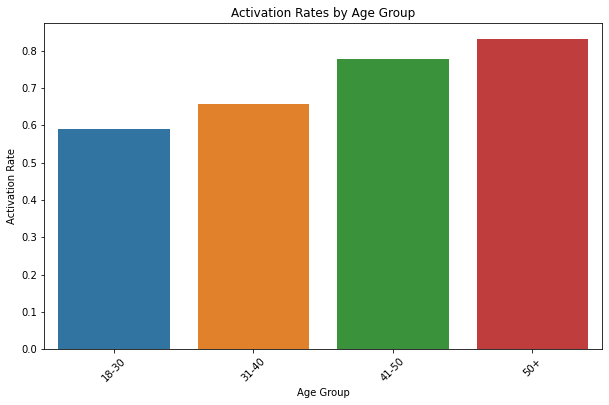

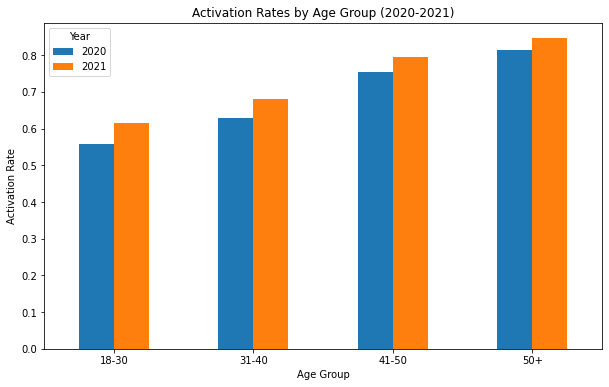

In [12]:
# Activation Rates by Age Group
plt.figure(figsize=(10, 6))
age_group_activation = merged_data.groupby('AGE_GROUP')['is_activated'].mean()
sns.barplot(x=age_group_activation.index, y=age_group_activation.values)
plt.title('Activation Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Activation Rate')
plt.xticks(rotation=45)
plt.show()


# Filter data for the years 2020 and 2021
merged_data['CREATE_YEAR'] = pd.to_datetime(merged_data['CREATE_MONTH']).dt.year
data_2020_2021 = merged_data[merged_data['CREATE_YEAR'].isin([2020, 2021])]

# Calculate activation rates by age group for each year
activation_rates_2020 = data_2020_2021[data_2020_2021['CREATE_YEAR'] == 2020].groupby('AGE_GROUP')['is_activated'].mean()
activation_rates_2021 = data_2020_2021[data_2020_2021['CREATE_YEAR'] == 2021].groupby('AGE_GROUP')['is_activated'].mean()

# Combine the results into a single DataFrame
activation_rates = pd.DataFrame({
    '2020': activation_rates_2020,
    '2021': activation_rates_2021
})

# Plot the clustered column chart
activation_rates.plot(kind='bar', figsize=(10, 6))
plt.title('Activation Rates by Age Group (2020-2021)')
plt.xlabel('Age Group')
plt.ylabel('Activation Rate')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.show()




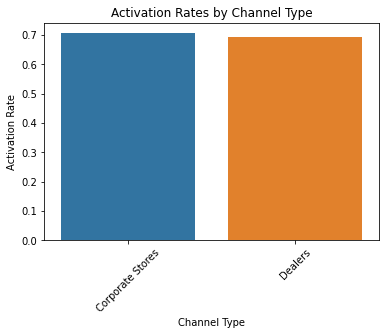

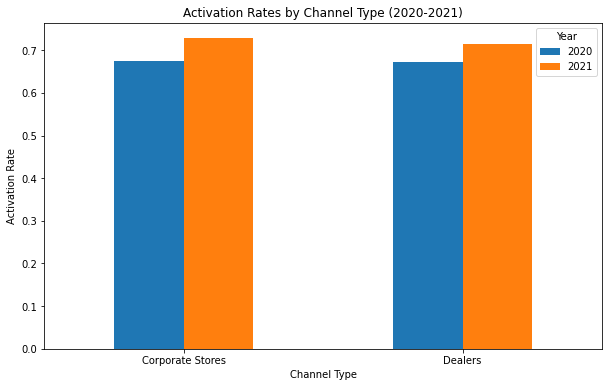

In [13]:
# Activation Rates by Channel Type
channel_type_activation = merged_data.groupby('CHANNEL_TYPE')['is_activated'].mean()
sns.barplot(x=channel_type_activation.index, y=channel_type_activation.values)
plt.title('Activation Rates by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Activation Rate')
plt.xticks(rotation=45)
plt.show()


merged_data['CREATE_YEAR'] = pd.to_datetime(merged_data['CREATE_MONTH']).dt.year
data_2020_2021 = merged_data[merged_data['CREATE_YEAR'].isin([2020, 2021])]

# Calculate activation rates by channel type for each year
activation_rates_2020 = data_2020_2021[data_2020_2021['CREATE_YEAR'] == 2020].groupby('CHANNEL_TYPE')['is_activated'].mean()
activation_rates_2021 = data_2020_2021[data_2020_2021['CREATE_YEAR'] == 2021].groupby('CHANNEL_TYPE')['is_activated'].mean()

# Combine the results into a single DataFrame
activation_rates = pd.DataFrame({
    '2020': activation_rates_2020,
    '2021': activation_rates_2021
})

# Plot the clustered column chart
activation_rates.plot(kind='bar', figsize=(10, 6))
plt.title('Activation Rates by Channel Type (2020-2021)')
plt.xlabel('Channel Type')
plt.ylabel('Activation Rate')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.show()




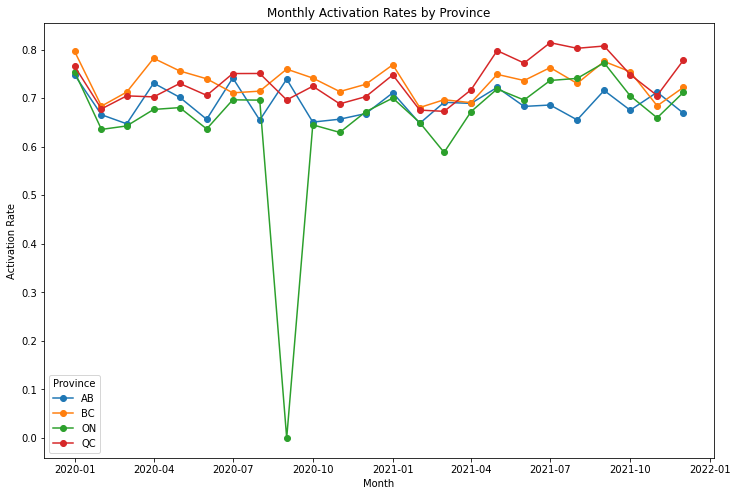

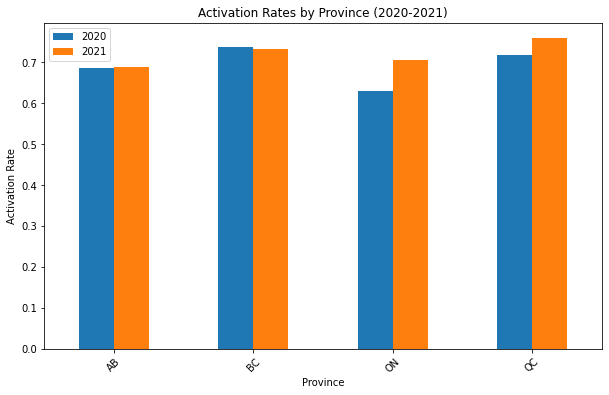

In [14]:
# Convert CREATE_MONTH to datetime
merged_data['CREATE_MONTH'] = pd.to_datetime(merged_data['CREATE_MONTH'])

# Calculate monthly activation rates by province
monthly_activation_rates_by_province = merged_data.groupby([merged_data['CREATE_MONTH'].dt.to_period('M'), 'ADR_PROVINCE'])['is_activated'].mean().unstack()

# Plot the line graph
plt.figure(figsize=(12, 8))
for province in monthly_activation_rates_by_province.columns:
    plt.plot(monthly_activation_rates_by_province.index.to_timestamp(), monthly_activation_rates_by_province[province], marker='o', label=province)

plt.title('Monthly Activation Rates by Province')
plt.xlabel('Month')
plt.ylabel('Activation Rate')
plt.legend(title='Province')

plt.show()


# Filter data for the years 2020 and 2021
merged_data['CREATE_YEAR'] = pd.to_datetime(merged_data['CREATE_MONTH']).dt.year
data_2020_2021 = merged_data[merged_data['CREATE_YEAR'].isin([2020, 2021])]

# Calculate activation rates by province for each year
activation_rates_2020 = data_2020_2021[data_2020_2021['CREATE_YEAR'] == 2020].groupby('ADR_PROVINCE')['is_activated'].mean()
activation_rates_2021 = data_2020_2021[data_2020_2021['CREATE_YEAR'] == 2021].groupby('ADR_PROVINCE')['is_activated'].mean()

# Combine the results into a single DataFrame
activation_rates = pd.DataFrame({
    '2020': activation_rates_2020,
    '2021': activation_rates_2021
})

# Plot the clustered column chart
activation_rates.plot(kind='bar', figsize=(10, 6))
plt.title('Activation Rates by Province (2020-2021)')
plt.xlabel('Province')
plt.ylabel('Activation Rate')
plt.xticks(rotation=45)

plt.show()


Average Credit Score: 741.4760320929664
B    0.475937
X    0.245680
L    0.157030
K    0.121353
Name: FIRST_CREDIT_CLASS, dtype: float64


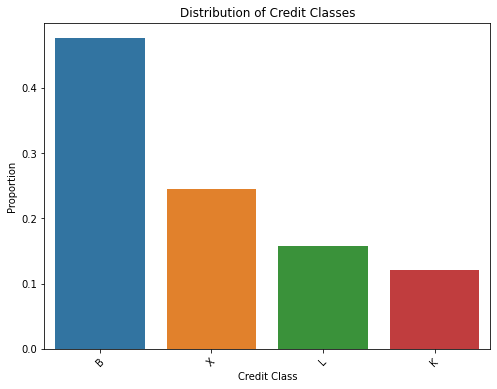

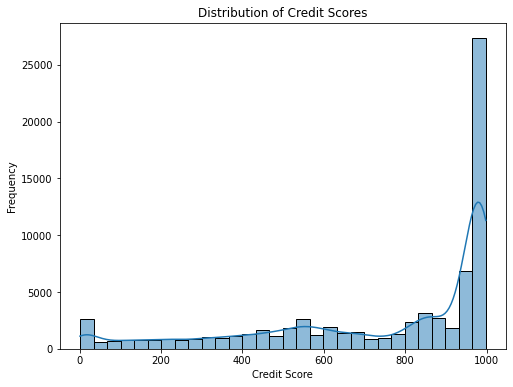

In [18]:
merged_data = pd.merge(credit_applications, credit_risk, on='BAN')

# Compute average credit score
avg_credit_score = merged_data['CREDIT_SCORE'].mean()
print(f"Average Credit Score: {avg_credit_score}")

# Distribution of credit classes
credit_class_distribution = merged_data['FIRST_CREDIT_CLASS'].value_counts(normalize=True)
print(credit_class_distribution)

# Visual 1: Distribution of Credit Classes Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x=credit_class_distribution.index, y=credit_class_distribution.values)
plt.title('Distribution of Credit Classes')
plt.xlabel('Credit Class')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

# Visual 2: Histogram of Credit Scores
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['CREDIT_SCORE'], bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()




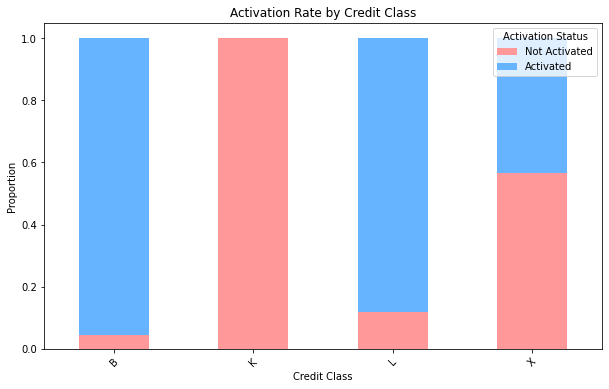

In [23]:
# Determine activated applications
merged_data['is_activated'] = merged_data['START_MONTH'].notna().astype(int)

# Group by credit class and activation status, then count the occurrences
activation_by_credit_class = merged_data.groupby(['FIRST_CREDIT_CLASS', 'is_activated']).size().unstack()

# Normalize the data to get the proportion
activation_by_credit_class = activation_by_credit_class.div(activation_by_credit_class.sum(axis=1), axis=0)

# Plot the stacked bar chart
activation_by_credit_class.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999','#66b3ff'])

plt.title('Activation Rate by Credit Class')
plt.xlabel('Credit Class')
plt.ylabel('Proportion')
plt.legend(title='Activation Status', labels=['Not Activated', 'Activated'])
plt.xticks(rotation=45)
plt.show()

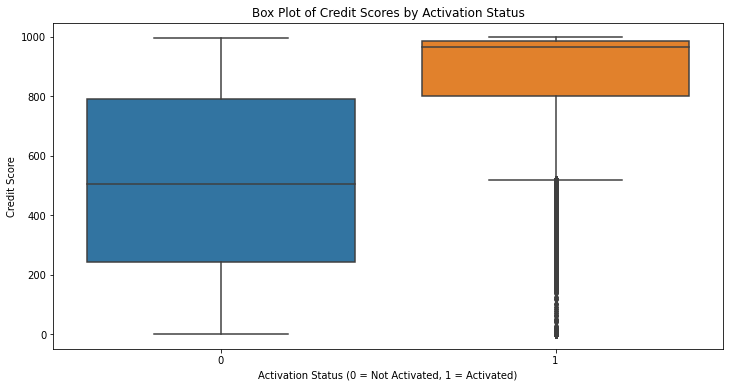

In [24]:
# Determine activated applications
merged_data['is_activated'] = merged_data['START_MONTH'].notna().astype(int)

# Box plot for credit scores
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_activated', y='CREDIT_SCORE', data=merged_data)
plt.title('Box Plot of Credit Scores by Activation Status')
plt.xlabel('Activation Status (0 = Not Activated, 1 = Activated)')
plt.ylabel('Credit Score')
plt.show()

